<a href="https://colab.research.google.com/github/InsightMart/DSPL_project/blob/main/DS_Model_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preperation

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [ ]:
#Load Dataset using pandas library
import pandas as pd
df=pd.read_csv('/content/cleaned_traincsv.csv')
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [ ]:
#Encoding categorical variables
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Encoded_outlet_city']= label_encoder.fit_transform(df['outlet_city'])
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,Encoded_outlet_city
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4,11
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1,13
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4,19
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4,19
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4,11


In [ ]:
#create a dataframe for Featuers (X) and Targets (y)
X = df[['Encoded_outlet_city', 'luxury_sales', 'fresh_sales', 'dry_sales']]
y = df['cluster_catgeory']

In [ ]:
# Scaling

# Standardize input variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

# Normalize input variables
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X2 = mms.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# Split X1 and y into training and testing sets
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X1, X2, y, test_size=0.3, random_state=42, stratify=y)

print('Whole Data shape', df.shape)
print('X1_train shape', X1_train.shape)
print('X1_test shape', X1_test.shape)
print('X2_train shape', X2_train.shape)
print('X2_test shape', X2_test.shape)

Whole Data shape (774150, 7)
X1_train shape (541905, 4)
X1_test shape (232245, 4)
X2_train shape (541905, 4)
X2_test shape (232245, 4)


## 1. Logistic Regression Model

In [ ]:
# Import the function from the package
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression()
logreg.fit(X1_train, y_train)

#Perform predictions on the test data
y_pred1=logreg.predict(X1_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Create a dataframe for comparing the actual vs predicted results by logistic regression classifier model
Comparison_df = pd.DataFrame({'Actual cluster_catgeory' : y_test, 'Predicted cluster_catgeory' : y_pred1})
Comparison_df

,Actual cluster_catgeory,Predicted cluster_catgeory
201122,2,2
207061,2,2
375630,1,1
552084,1,1
24499,4,4
...,...,...
253842,2,2
615954,6,6
338522,5,5
710046,6,6


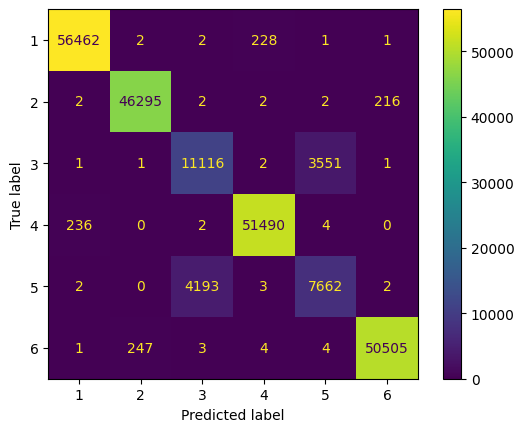

In [ ]:
# Import the function from the package
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Construct the confusion matrix cm
cm = confusion_matrix(y_test, y_pred1, labels=logreg.classes_)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(cm,display_labels=logreg.classes_)
disp.plot()

In [ ]:
# Classification metrics report

# Import the function from the package
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     56696
           2       0.99      1.00      0.99     46519
           3       0.73      0.76      0.74     14672
           4       1.00      1.00      1.00     51732
           5       0.68      0.65      0.66     11862
           6       1.00      0.99      1.00     50764

    accuracy                           0.96    232245
   macro avg       0.90      0.90      0.90    232245
weighted avg       0.96      0.96      0.96    232245



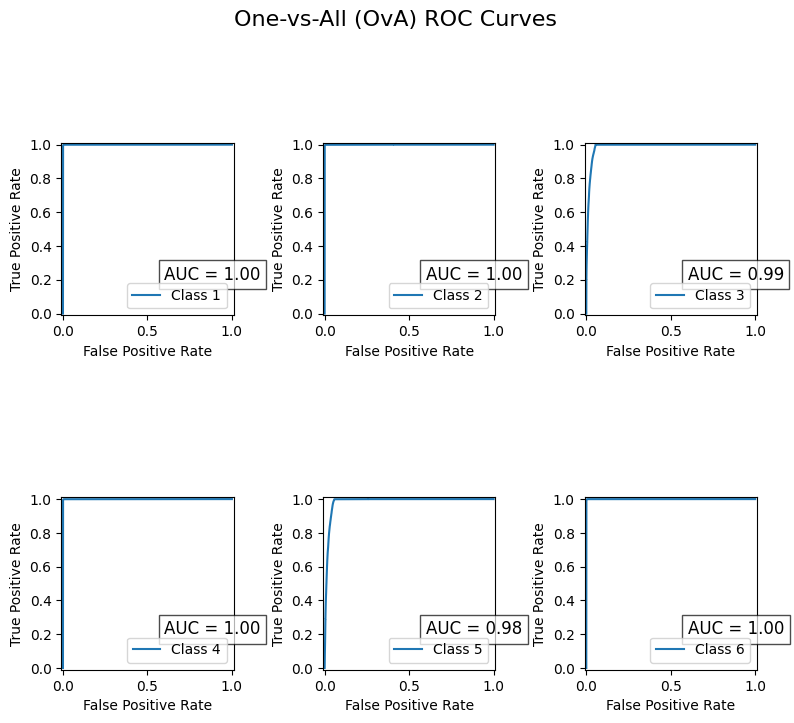

In [ ]:
# ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.preprocessing import label_binarize

# Get predicted probabilities for each class
y_prob1 = logreg.predict_proba(X1_test)

# Create a 2x3 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(8, 8))

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot ROC curves for each class
for i, class_label in enumerate(logreg.classes_):
    fpr, tpr, _ = roc_curve(y_test == class_label, y_prob1[:, i])
    auc = roc_auc_score(y_test == class_label, y_prob1[:, i])  # Calculate AUC
    RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=f'Class {class_label}').plot(ax=axes[i])
    axes[i].text(0.6, 0.2, f'AUC = {auc:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))  # Add AUC value to the plot

plt.suptitle("One-vs-All (OvA) ROC Curves", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the top to fit the suptitle
plt.show()

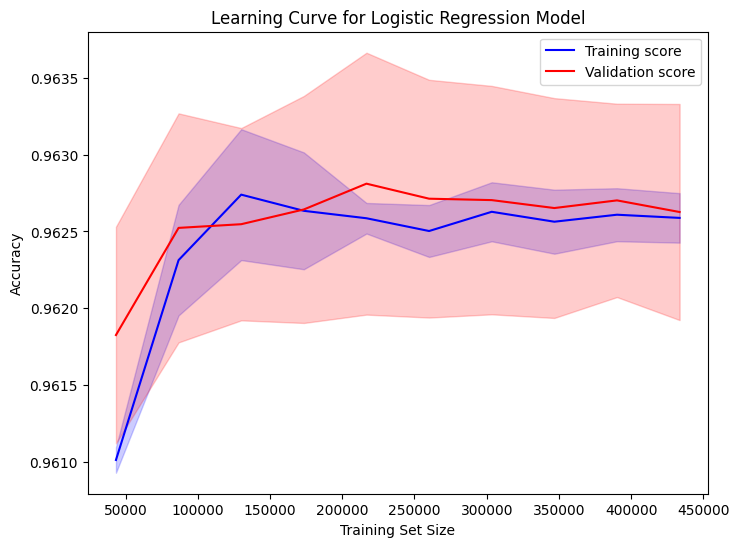

In [ ]:
# Learning Curve

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, valid_scores = learning_curve(logreg, X1_train, y_train,
                                                         train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                         cv=5, scoring='accuracy', n_jobs=-1)

# Calculate the mean and standard deviation of the training and validation scores
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
valid_mean = valid_scores.mean(axis=1)
valid_std = valid_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label='Training score', color='b')
plt.plot(train_sizes, valid_mean, label='Validation score', color='r')

# Plot the fill between the standard deviations for training and validation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='b', alpha=0.2)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color='r', alpha=0.2)

# Label the plot
plt.title('Learning Curve for Logistic Regression Model')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.show()

## 2. K-Nearest Neighbors Model

In [ ]:
# Import the function from the package
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Mean Error')

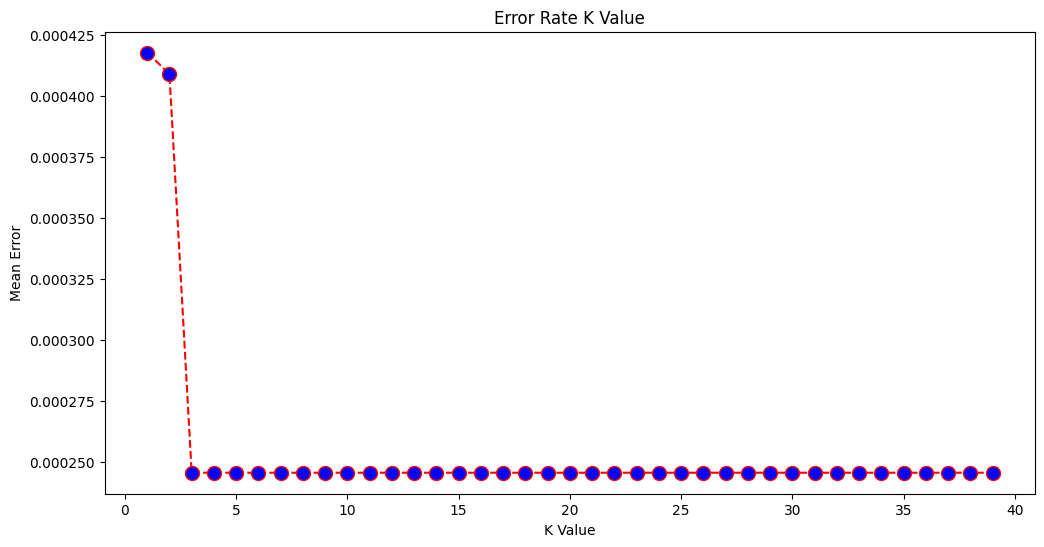

In [ ]:
# Calculating error for K values between 1 and 40
error = []
import numpy as np
import matplotlib.pyplot as plt
# Calculating error for K values between 1 and 40
for i in range(1, 40):
  knn2 = KNeighborsClassifier(n_neighbors=i)
  knn2.fit(X2_train, y_train)
  pred_i = knn2.predict(X2_test)
  error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

By looking at the plot, it suggest lowest K Value with lowest Mean Error is 21. Therefore let's make a Knn model with K Value 21.

In [ ]:
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 21)
# Fit the classifier to the data
knn.fit(X2_train,y_train)

# Perform predictions on the test data
y_pred2=knn.predict(X2_test)

In [ ]:
# Get predicted probabilities for each class
y_prob2 = knn.predict_proba(X2_test)

In [ ]:
# Create a dataframe for comparing the actual vs predicted results by kNN mode
compare_results_knn_df = pd.DataFrame({'Actual cluster_catgeory' : y_test, 'Predicted cluster_catgeory': y_pred2})
compare_results_knn_df

,Actual cluster_catgeory,Predicted cluster_catgeory
201122,2,2
207061,2,2
375630,1,1
552084,1,1
24499,4,4
...,...,...
253842,2,2
615954,6,6
338522,5,5
710046,6,6


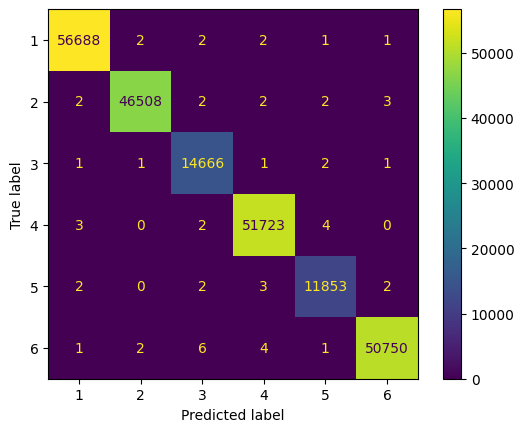

In [ ]:
# Import the packages for costructing the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Costruct the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred2, labels = knn.classes_)

# Plot the confusion matrix
disp_knn_cm = ConfusionMatrixDisplay(cm_knn, display_labels=knn.classes_)
disp_knn_cm.plot()

In [ ]:
# Classification metrics report

# Import the function from the package
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     56696
           2       1.00      1.00      1.00     46519
           3       1.00      1.00      1.00     14672
           4       1.00      1.00      1.00     51732
           5       1.00      1.00      1.00     11862
           6       1.00      1.00      1.00     50764

    accuracy                           1.00    232245
   macro avg       1.00      1.00      1.00    232245
weighted avg       1.00      1.00      1.00    232245



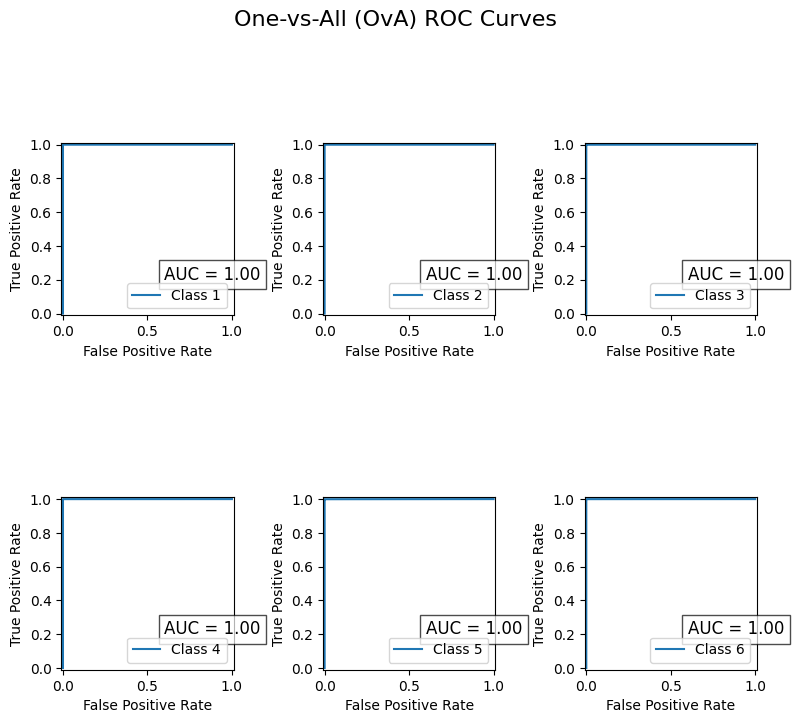

In [ ]:
# ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.preprocessing import label_binarize

# Get predicted probabilities for each class
y_prob2 = knn.predict_proba(X2_test)

# Create a 2x3 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(8, 8))

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot ROC curves for each class
for i, class_label in enumerate(knn.classes_):
    fpr, tpr, _ = roc_curve(y_test == class_label, y_prob2[:, i])
    auc = roc_auc_score(y_test == class_label, y_prob2[:, i])  # Calculate AUC
    RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=f'Class {class_label}').plot(ax=axes[i])
    axes[i].text(0.6, 0.2, f'AUC = {auc:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))  # Add AUC value to the plot

plt.suptitle("One-vs-All (OvA) ROC Curves", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the top to fit the suptitle
plt.show()

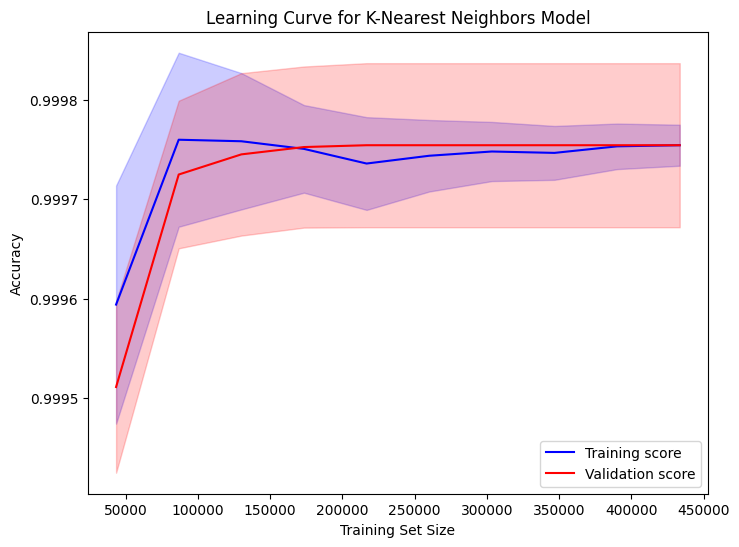

In [ ]:
# Learning Curve

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, valid_scores = learning_curve(knn, X2_train, y_train,
                                                         train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                         cv=5, scoring='accuracy', n_jobs=-1)

# Calculate the mean and standard deviation of the training and validation scores
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
valid_mean = valid_scores.mean(axis=1)
valid_std = valid_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label='Training score', color='b')
plt.plot(train_sizes, valid_mean, label='Validation score', color='r')

# Plot the fill between the standard deviations for training and validation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='b', alpha=0.2)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color='r', alpha=0.2)

# Label the plot
plt.title('Learning Curve for K-Nearest Neighbors Model')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.show()

## 3. Naive Bayes Model

In [ ]:
# Import the function from the package
from sklearn.naive_bayes import GaussianNB

# instantiate the model
nb = GaussianNB()
nb.fit(X1_train, y_train)

# Perform predictions on the test data
y_pred3=nb.predict(X1_test)

In [ ]:
# Create a dataframe for comparing the actual vs predicted results by Naive Bayes model
compare_results_nb_df = pd.DataFrame({'Actual cluster_catgeory' : y_test, 'Predicted cluster_catgeory': y_pred3})
compare_results_nb_df

,Actual cluster_catgeory,Predicted cluster_catgeory
201122,2,2
207061,2,2
375630,1,4
552084,1,1
24499,4,4
...,...,...
253842,2,2
615954,6,6
338522,5,5
710046,6,2


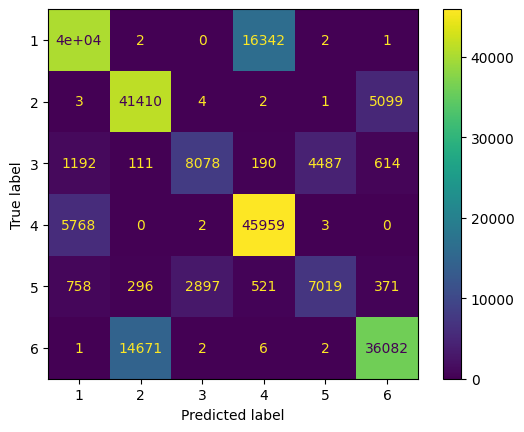

In [ ]:
# Import the packages for costructing the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Costruct the confusion matrix
nb_cm = confusion_matrix(y_test, y_pred3, labels = nb.classes_)

# Plot the confusion matrix
disp_nb_cm = ConfusionMatrixDisplay(nb_cm, display_labels = nb.classes_)
disp_nb_cm.plot()

In [ ]:
# Classification metrics report

# Import the function from the package
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           1       0.84      0.71      0.77     56696
           2       0.73      0.89      0.80     46519
           3       0.74      0.55      0.63     14672
           4       0.73      0.89      0.80     51732
           5       0.61      0.59      0.60     11862
           6       0.86      0.71      0.78     50764

    accuracy                           0.77    232245
   macro avg       0.75      0.72      0.73    232245
weighted avg       0.78      0.77      0.77    232245



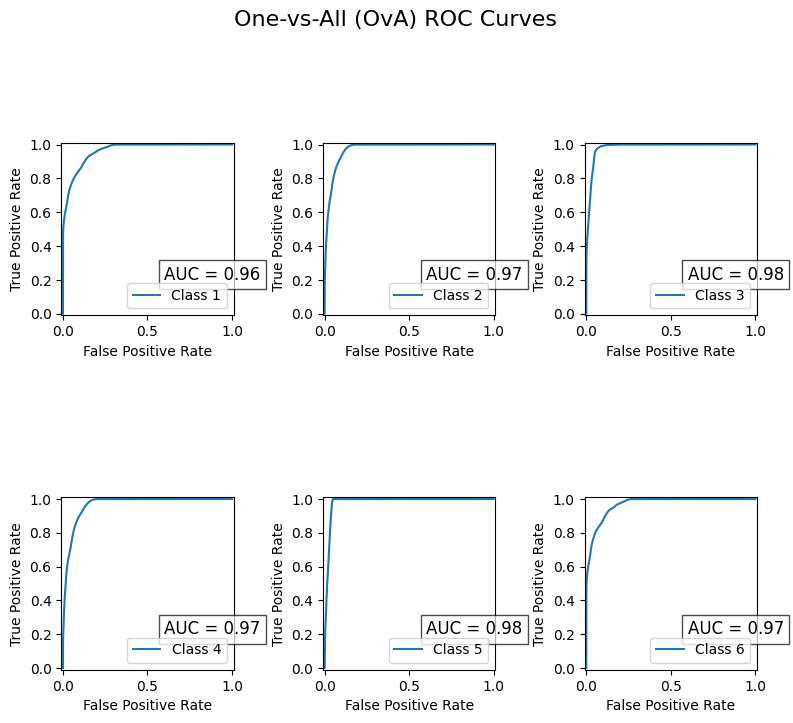

In [ ]:
# ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.preprocessing import label_binarize

# Get predicted probabilities for each class
y_prob3 = nb.predict_proba(X1_test)

# Create a 2x3 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(8, 8))

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot ROC curves for each class
for i, class_label in enumerate(nb.classes_):
    fpr, tpr, _ = roc_curve(y_test == class_label, y_prob3[:, i])
    auc = roc_auc_score(y_test == class_label, y_prob3[:, i])  # Calculate AUC
    RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=f'Class {class_label}').plot(ax=axes[i])
    axes[i].text(0.6, 0.2, f'AUC = {auc:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))  # Add AUC value to the plot

plt.suptitle("One-vs-All (OvA) ROC Curves", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the top to fit the suptitle
plt.show()

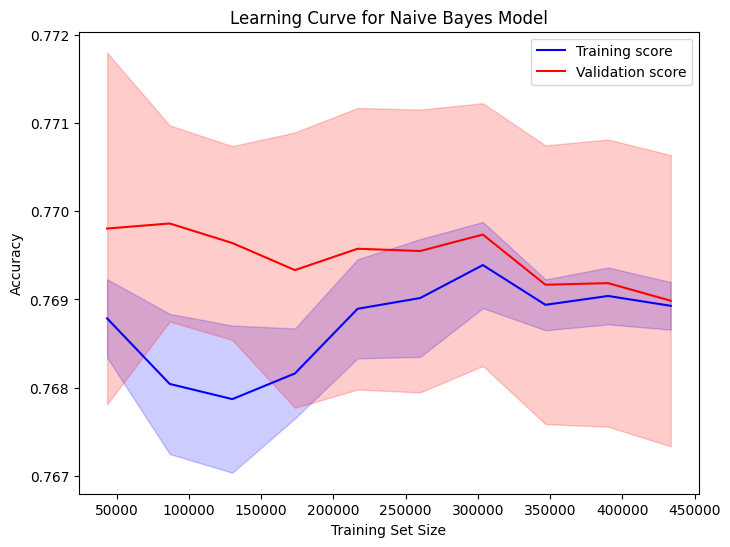

In [ ]:
# Learning Curve

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, valid_scores = learning_curve(nb, X1_train, y_train,
                                                         train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                         cv=5, scoring='accuracy', n_jobs=-1)

# Calculate the mean and standard deviation of the training and validation scores
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
valid_mean = valid_scores.mean(axis=1)
valid_std = valid_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label='Training score', color='b')
plt.plot(train_sizes, valid_mean, label='Validation score', color='r')

# Plot the fill between the standard deviations for training and validation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='b', alpha=0.2)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color='r', alpha=0.2)

# Label the plot
plt.title('Learning Curve for Naive Bayes Model')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.show()

## 4. XGBoost Model

In [ ]:
# Import the function from the package
from xgboost import XGBClassifier

y_train1 = y_train - 1  # Convert 1-6 to 0-5
y_test1 = y_test - 1

# Train Random Forest Model
xgb = XGBClassifier()
xgb.fit(X1_train, y_train1)

# Perform predictions on the test data
y_pred5 = xgb.predict(X1_test)

y_pred5 = y_pred5 + 1  # Convert 0-5 to 1-6

In [ ]:
# Get predicted probabilities for each class
y_prob5 = xgb.predict_proba(X1_test)
y_prob5 = y_prob5 + 1

In [ ]:
# Create a dataframe for comparing the actual vs predicted results by XGBClassifier Model
compare_results_xgb_df = pd.DataFrame({'Actual cluster_catgeory' : y_test, 'Predicted cluster_catgeory': y_pred5})
compare_results_xgb_df

,Actual cluster_catgeory,Predicted cluster_catgeory
201122,2,2
207061,2,2
375630,1,1
552084,1,1
24499,4,4
...,...,...
253842,2,2
615954,6,6
338522,5,5
710046,6,6


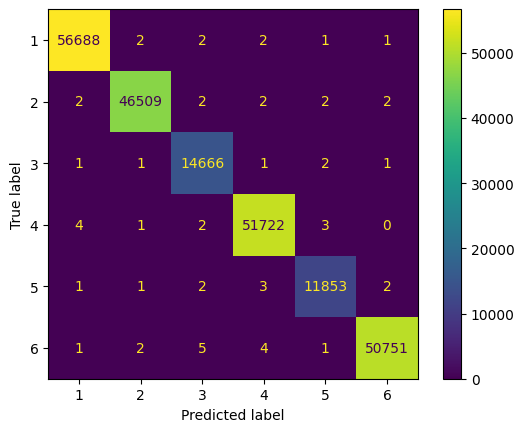

In [ ]:
# Import the required packages
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# Construct the confusion matrix
xgb_cm = confusion_matrix(y_test, y_pred5, labels=np.unique(y_test))

# Plot the confusion matrix
disp_xgb_cm = ConfusionMatrixDisplay(xgb_cm, display_labels=np.unique(y_test))
disp_xgb_cm.plot()

In [ ]:
# Classification metrics report

# Import the function from the package
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred5))

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     56696
           2       1.00      1.00      1.00     46519
           3       1.00      1.00      1.00     14672
           4       1.00      1.00      1.00     51732
           5       1.00      1.00      1.00     11862
           6       1.00      1.00      1.00     50764

    accuracy                           1.00    232245
   macro avg       1.00      1.00      1.00    232245
weighted avg       1.00      1.00      1.00    232245



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


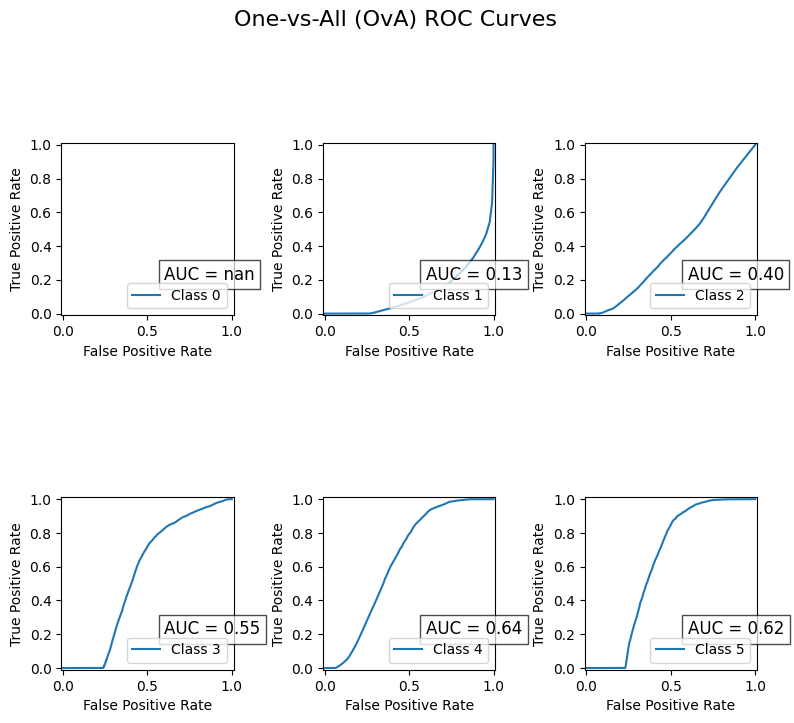

In [ ]:
# ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.preprocessing import label_binarize

# Get predicted probabilities for each class
y_prob5 = xgb.predict_proba(X1_test)
y_prob5 = y_prob5 + 1

# Create a 2x3 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(8, 8))

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot ROC curves for each class
for i, class_label in enumerate(xgb.classes_):
    fpr, tpr, _ = roc_curve(y_test == class_label, y_prob5[:, i])
    auc = roc_auc_score(y_test == class_label, y_prob5[:, i])  # Calculate AUC
    RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=f'Class {class_label}').plot(ax=axes[i])
    axes[i].text(0.6, 0.2, f'AUC = {auc:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))  # Add AUC value to the plot

plt.suptitle("One-vs-All (OvA) ROC Curves", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the top to fit the suptitle
plt.show()

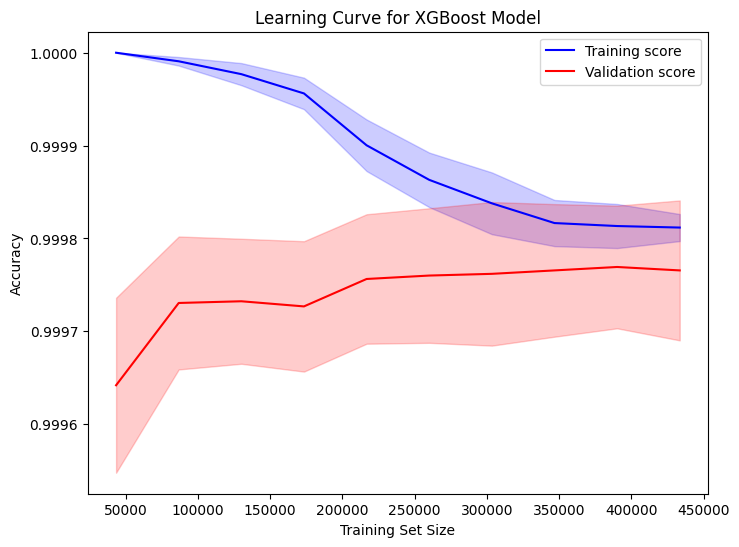

In [ ]:
# Learning Curve

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


y_train1 = y_train - 1  # Convert 1-6 to 0-5
y_test1 = y_test - 1

# Generate learning curve data
train_sizes, train_scores, valid_scores = learning_curve(xgb, X1_train, y_train1,
                                                         train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                         cv=5, scoring='accuracy', n_jobs=-1)

# Calculate the mean and standard deviation of the training and validation scores
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
valid_mean = valid_scores.mean(axis=1)
valid_std = valid_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label='Training score', color='b')
plt.plot(train_sizes, valid_mean, label='Validation score', color='r')

# Plot the fill between the standard deviations for training and validation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='b', alpha=0.2)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color='r', alpha=0.2)

# Label the plot
plt.title('Learning Curve for XGBoost Model')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.show()

## Hyperparameter Tuning

### 5. Tuned Logistic Regression Model

In [ ]:
# Import the function from the package
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# create new a log_reg model
log_reg = LogisticRegression(max_iter=500)

# Define hyperparameter grid
param_grid1 = {'C': np.logspace(-3, 3, 5),  # Regularization strength
              'penalty': ['l1', 'l2'],  # Regularization type
              'solver': ['liblinear'] } # Suitable solver for L1 and L2

#use gridsearch to test all values
lr_gscv = GridSearchCV(log_reg, param_grid1, cv=3, scoring='roc_auc_ovr')
#fit model to data
lr_gscv.fit(X1_train, y_train)

# Get the best estimator (tuned model)
best_lr = lr_gscv.best_estimator_
best_lr

LogisticRegression(C=np.float64(1000.0), max_iter=500, solver='liblinear')

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     56696
           2       1.00      1.00      1.00     46519
           3       0.72      0.77      0.74     14672
           4       1.00      1.00      1.00     51732
           5       0.68      0.63      0.65     11862
           6       1.00      1.00      1.00     50764

    accuracy                           0.96    232245
   macro avg       0.90      0.90      0.90    232245
weighted avg       0.96      0.96      0.96    232245



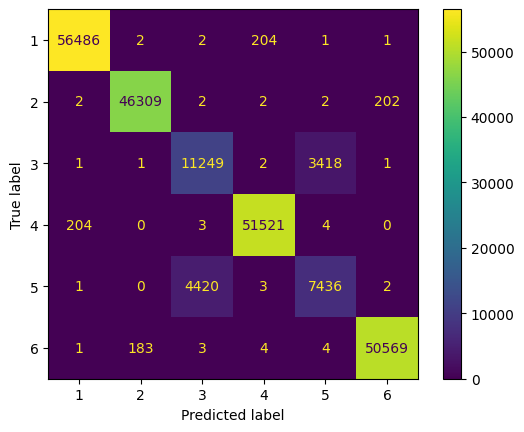

In [ ]:
# Perform testing on test dataset
y_pred6 = best_lr.predict(X1_test)

# Construct a confusion matrix
cm_best_lr = confusion_matrix(y_test, y_pred6, labels = best_lr.classes_)
disp_best_lr_cm = ConfusionMatrixDisplay(cm_best_lr, display_labels=best_lr.classes_)
disp_best_lr_cm.plot()

# Display the classification report
print(classification_report(y_test, y_pred6))

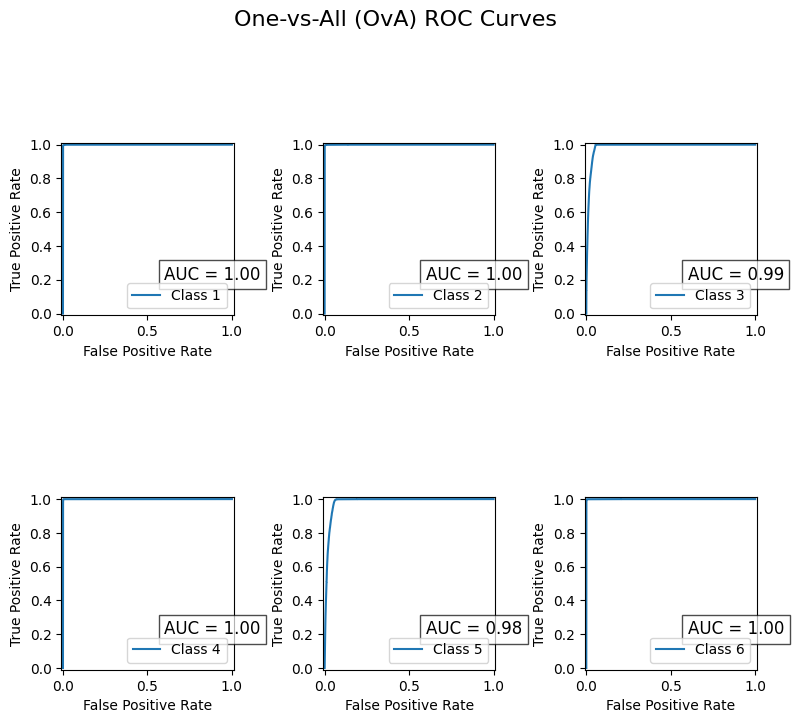

In [ ]:
# ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.preprocessing import label_binarize

# Get predicted probabilities for each class
y_prob6 = best_lr.predict_proba(X1_test)

# Create a 2x3 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(8, 8))

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot ROC curves for each class
for i, class_label in enumerate(best_lr.classes_):
    fpr, tpr, _ = roc_curve(y_test == class_label, y_prob6[:, i])
    auc = roc_auc_score(y_test == class_label, y_prob6[:, i])  # Calculate AUC
    RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=f'Class {class_label}').plot(ax=axes[i])
    axes[i].text(0.6, 0.2, f'AUC = {auc:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))  # Add AUC value to the plot

plt.suptitle("One-vs-All (OvA) ROC Curves", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the top to fit the suptitle
plt.show()

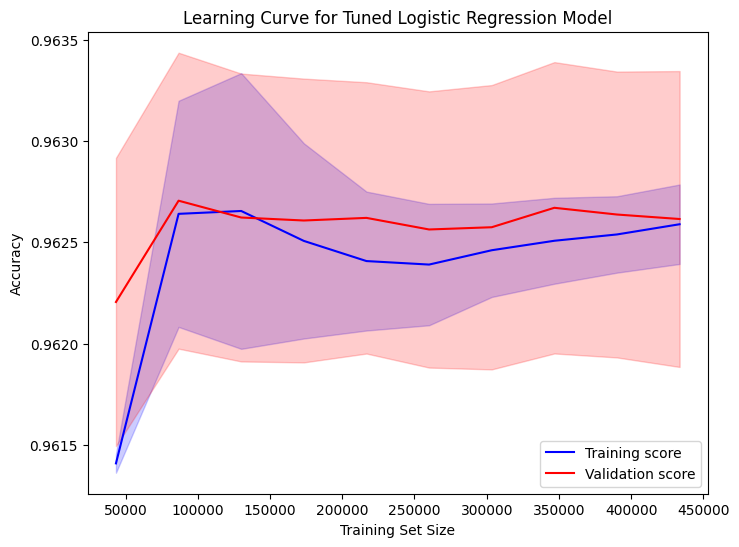

In [ ]:
# Learning Curve

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, valid_scores = learning_curve(best_lr, X1_train, y_train,
                                                         train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                         cv=5, scoring='accuracy', n_jobs=-1)

# Calculate the mean and standard deviation of the training and validation scores
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
valid_mean = valid_scores.mean(axis=1)
valid_std = valid_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label='Training score', color='b')
plt.plot(train_sizes, valid_mean, label='Validation score', color='r')

# Plot the fill between the standard deviations for training and validation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='b', alpha=0.2)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color='r', alpha=0.2)

# Label the plot
plt.title('Learning Curve for Tuned Logistic Regression Model')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.show()

### 6. Tuned K-Nearest Neighbors Model

In [ ]:
# Import the function from the package
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# create a new knn model
knn = KNeighborsClassifier()

# Define hyperparameter grid
param_grid2 = {'n_neighbors': np.arange(1, 25), # 1-25 nearset neighbors
              'metric': ['euclidean', 'manhattan']} # Distance calculation method

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid2, cv=5, scoring = 'roc_auc_ovr')
#fit model to data
knn_gscv.fit(X2_train, y_train)

# Get the best estimator (tuned model)
best_knn = knn_gscv.best_estimator_
best_knn

KNeighborsClassifier(metric='euclidean', n_neighbors=np.int64(23))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     56696
           2       1.00      1.00      1.00     46519
           3       1.00      1.00      1.00     14672
           4       1.00      1.00      1.00     51732
           5       1.00      1.00      1.00     11862
           6       1.00      1.00      1.00     50764

    accuracy                           1.00    232245
   macro avg       1.00      1.00      1.00    232245
weighted avg       1.00      1.00      1.00    232245



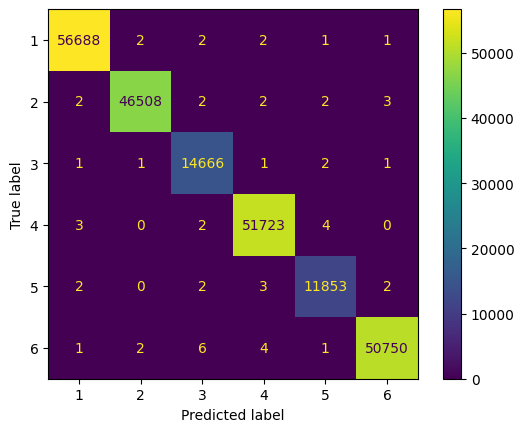

In [ ]:
# Perform testing on test dataset
y_pred7 = best_knn.predict(X2_test)

# Construct a confusion matrix
cm_best_knn = confusion_matrix(y_test, y_pred7, labels = best_knn.classes_)
disp_best_knn_cm = ConfusionMatrixDisplay(cm_best_knn, display_labels=best_knn.classes_)
disp_best_knn_cm.plot()

# Display the classification report
print(classification_report(y_test, y_pred7))

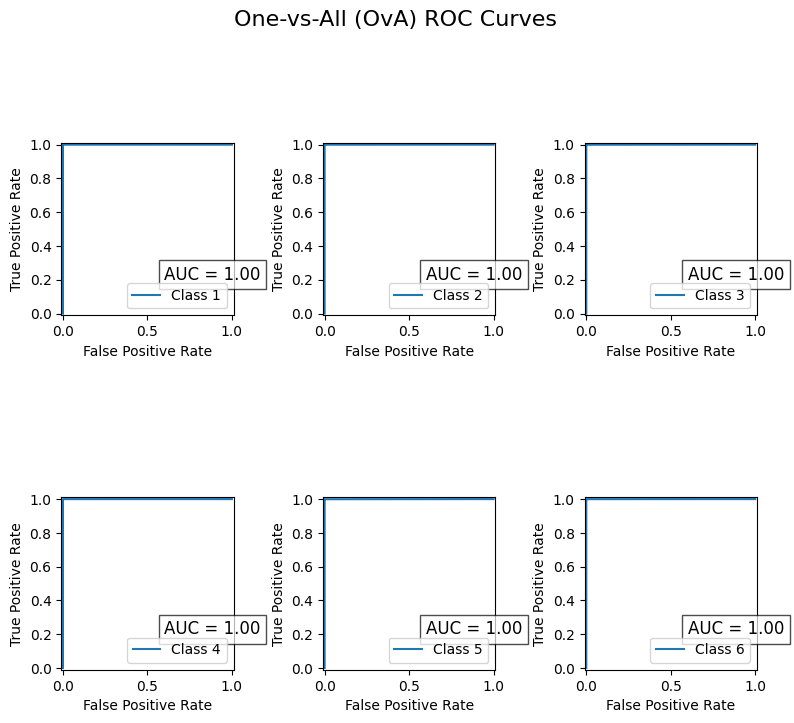

In [ ]:
# ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.preprocessing import label_binarize

# Get predicted probabilities for each class
y_prob7 = best_knn.predict_proba(X2_test)

# Create a 2x3 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(8, 8))

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot ROC curves for each class
for i, class_label in enumerate(best_knn.classes_):
    fpr, tpr, _ = roc_curve(y_test == class_label, y_prob7[:, i])
    auc = roc_auc_score(y_test == class_label, y_prob7[:, i])  # Calculate AUC
    RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=f'Class {class_label}').plot(ax=axes[i])
    axes[i].text(0.6, 0.2, f'AUC = {auc:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))  # Add AUC value to the plot

plt.suptitle("One-vs-All (OvA) ROC Curves", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the top to fit the suptitle
plt.show()

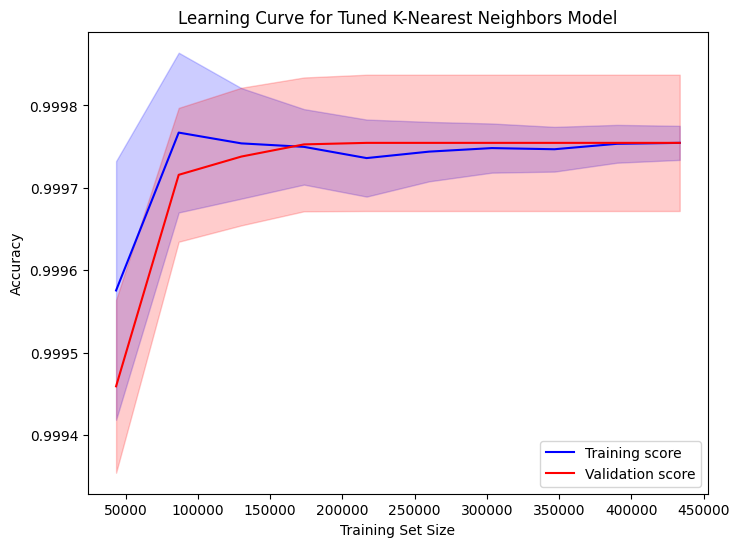

In [ ]:
# Learning Curve

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, valid_scores = learning_curve(best_knn, X2_train, y_train,
                                                         train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                         cv=5, scoring='accuracy', n_jobs=-1)

# Calculate the mean and standard deviation of the training and validation scores
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
valid_mean = valid_scores.mean(axis=1)
valid_std = valid_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label='Training score', color='b')
plt.plot(train_sizes, valid_mean, label='Validation score', color='r')

# Plot the fill between the standard deviations for training and validation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='b', alpha=0.2)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color='r', alpha=0.2)

# Label the plot
plt.title('Learning Curve for Tuned K-Nearest Neighbors Model')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.show()

### 7. Tuned Naive Bayes Model

In [ ]:
# Import the function from the package
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import numpy as np

# create new a nb model
nb = GaussianNB()

# Define hyperparameter grid
param_grid3 = {'var_smoothing': np.logspace(-9, 0, 10)} #  prevent division by zero

#use gridsearch to test all values
nb_gscv = GridSearchCV(nb, param_grid3, cv=3, scoring='roc_auc_ovr')
#fit model to data
nb_gscv.fit(X2_train, y_train)

# Get the best estimator (tuned model)
best_nb = nb_gscv.best_estimator_
best_nb

GaussianNB(var_smoothing=np.float64(1e-09))

              precision    recall  f1-score   support

           1       0.84      0.71      0.77     56696
           2       0.73      0.89      0.80     46519
           3       0.74      0.55      0.63     14672
           4       0.73      0.89      0.80     51732
           5       0.61      0.59      0.60     11862
           6       0.86      0.71      0.78     50764

    accuracy                           0.77    232245
   macro avg       0.75      0.72      0.73    232245
weighted avg       0.78      0.77      0.77    232245



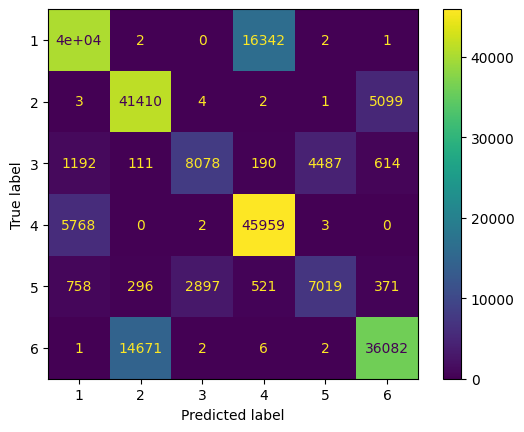

In [ ]:
# Perform testing on test dataset
y_pred8 = best_nb.predict(X2_test)

# Construct a confusion matrix
cm_best_nb = confusion_matrix(y_test, y_pred8, labels = best_nb.classes_)
disp_best_nb_cm = ConfusionMatrixDisplay(cm_best_nb, display_labels=best_nb.classes_)
disp_best_nb_cm.plot()

# Display the classification report
print(classification_report(y_test, y_pred8))

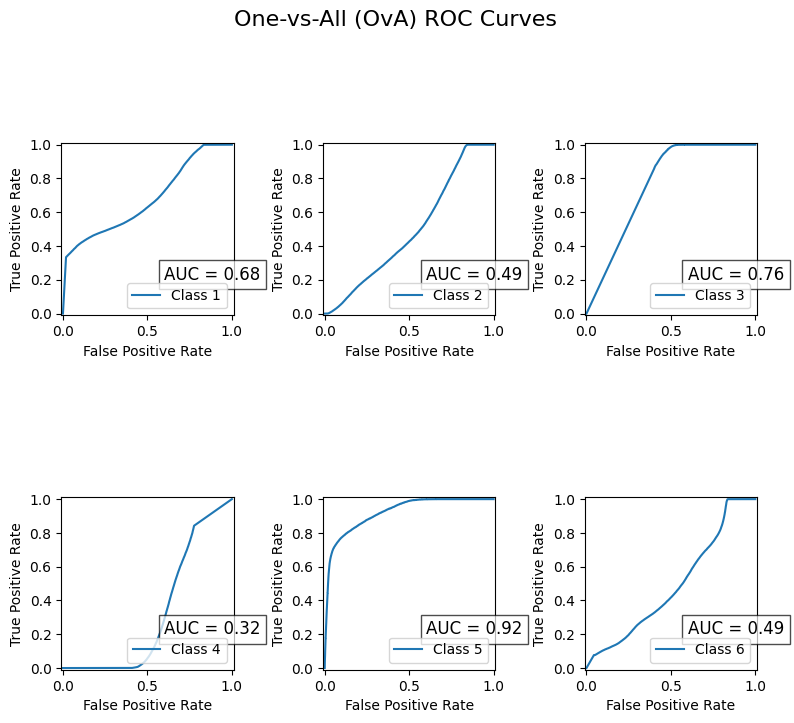

In [ ]:
# ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.preprocessing import label_binarize

# Get predicted probabilities for each class
y_prob8= best_nb.predict_proba(X1_test)

# Create a 2x3 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(8, 8))

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot ROC curves for each class
for i, class_label in enumerate(best_nb.classes_):
    fpr, tpr, _ = roc_curve(y_test == class_label, y_prob8[:, i])
    auc = roc_auc_score(y_test == class_label, y_prob8[:, i])  # Calculate AUC
    RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=f'Class {class_label}').plot(ax=axes[i])
    axes[i].text(0.6, 0.2, f'AUC = {auc:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))  # Add AUC value to the plot

plt.suptitle("One-vs-All (OvA) ROC Curves", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the top to fit the suptitle
plt.show()

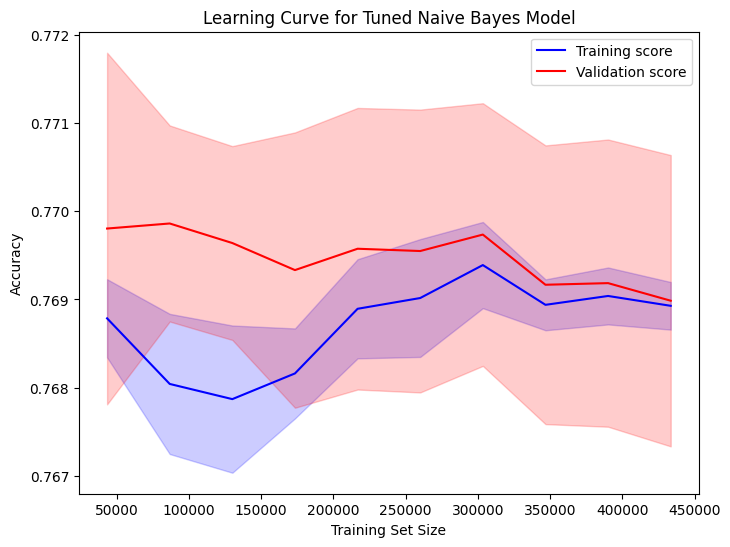

In [ ]:
# Learning Curve

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, valid_scores = learning_curve(best_nb, X1_train, y_train,
                                                         train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                         cv=5, scoring='accuracy', n_jobs=-1)

# Calculate the mean and standard deviation of the training and validation scores
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
valid_mean = valid_scores.mean(axis=1)
valid_std = valid_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label='Training score', color='b')
plt.plot(train_sizes, valid_mean, label='Validation score', color='r')

# Plot the fill between the standard deviations for training and validation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='b', alpha=0.2)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color='r', alpha=0.2)

# Label the plot
plt.title('Learning Curve for Tuned Naive Bayes Model')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.show()

### 8. Tuned XGBoost Model

In [ ]:
# Import the function from the package
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

y_train1 = y_train - 1  # Convert 1-6 to 0-5
y_test1 = y_test - 1

# create new a nb model
xgb = XGBClassifier()

# Define hyperparameter grid
param_grid5 = {'n_estimators': [50, 100, 150],
               'learning_rate': [0.01, 0.1, 0.2],
               'max_depth': [3, 5, 7]}

#use gridsearch to test all values
xgb_gscv = GridSearchCV(xgb, param_grid5, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
#fit model to data
xgb_gscv.fit(X1_train, y_train1)

# Get the best estimator (tuned model)
best_xgb = xgb_gscv.best_estimator_
best_xgb

Fitting 3 folds for each of 27 candidates, totalling 81 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     56696
           2       1.00      1.00      1.00     46519
           3       1.00      1.00      1.00     14672
           4       1.00      1.00      1.00     51732
           5       1.00      1.00      1.00     11862
           6       1.00      1.00      1.00     50764

    accuracy                           1.00    232245
   macro avg       1.00      1.00      1.00    232245
weighted avg       1.00      1.00      1.00    232245



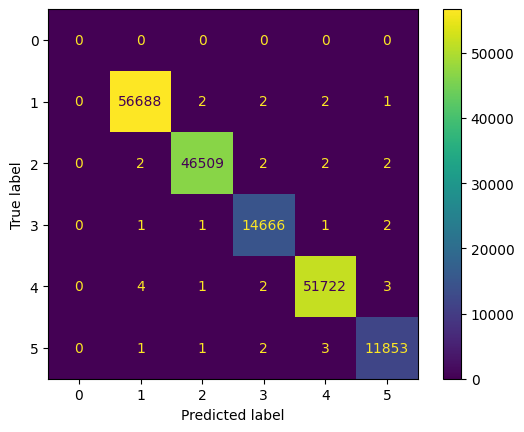

In [ ]:
# Perform testing on test dataset
y_pred10 = best_xgb.predict(X1_test)
y_pred10 = y_pred10 + 1

# Construct a confusion matrix
cm_best_xgb = confusion_matrix(y_test, y_pred10, labels = best_xgb.classes_)
disp_best_xgb_cm = ConfusionMatrixDisplay(cm_best_xgb, display_labels=best_xgb.classes_)
disp_best_xgb_cm.plot()

# Display the classification report
print(classification_report(y_test, y_pred10))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


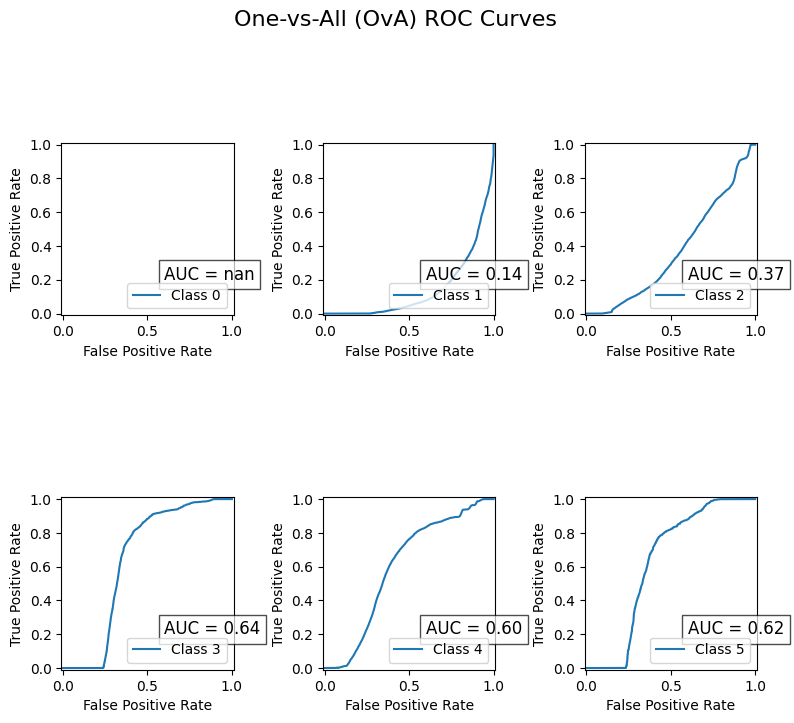

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.preprocessing import label_binarize

# Get predicted probabilities for each class
y_prob10 = best_xgb.predict_proba(X1_test)
y_prob10 = y_prob10 + 1

# Create a 2x3 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(8, 8))

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot ROC curves for each class
for i, class_label in enumerate(best_xgb.classes_):
    fpr, tpr, _ = roc_curve(y_test == class_label, y_prob10[:, i])
    auc = roc_auc_score(y_test == class_label, y_prob10[:, i])  # Calculate AUC
    RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=f'Class {class_label}').plot(ax=axes[i])
    axes[i].text(0.6, 0.2, f'AUC = {auc:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))  # Add AUC value to the plot

plt.suptitle("One-vs-All (OvA) ROC Curves", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the top to fit the suptitle
plt.show()

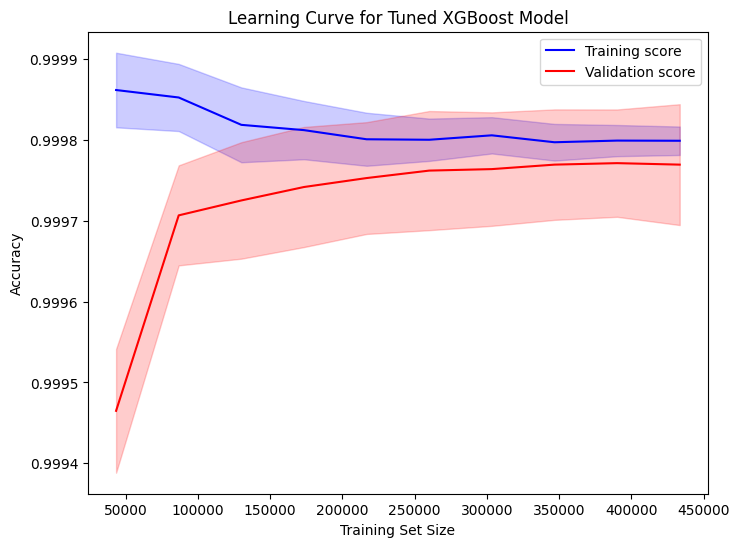

In [ ]:
# Learning Curve

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, valid_scores = learning_curve(best_xgb, X1_train, y_train1,
                                                         train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                         cv=5, scoring='accuracy', n_jobs=-1)

# Calculate the mean and standard deviation of the training and validation scores
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
valid_mean = valid_scores.mean(axis=1)
valid_std = valid_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label='Training score', color='b')
plt.plot(train_sizes, valid_mean, label='Validation score', color='r')

# Plot the fill between the standard deviations for training and validation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='b', alpha=0.2)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color='r', alpha=0.2)

# Label the plot
plt.title('Learning Curve for Tuned XGBoost Model')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.show()

## Best Model Finding

In [31]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
import numpy as np
from scipy.special import softmax

# List of models and their predictions
models = [('Logistic Regression', logreg, y_pred1, y_prob1),
          ('KNN', knn, y_pred2, y_prob2),
          ('Gaussian Naive Bayes', nb, y_pred3, y_prob3),
          ('XGBoost', xgb, y_pred4, y_prob4),
          ('Tuned Logistic Regression', best_lr, y_pred5, y_prob5),
          ('Tuned KNN', best_knn, y_pred6, y_prob6),
          ('Tuned Naive Bayes', best_nb, y_pred7, y_prob7),
          ('Tuned XGBoost', best_xgb, y_pred8, y_prob8)]

# Initialize a dictionary to store metrics
metrics_dict = {'Model': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'AUC Score': [], 'Accuracy': []}

# Loop through each model and calculate metrics
for model_name, model, y_pred, y_prob in models:
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)  # Compute accuracy

    # Ensure y_prob is properly formatted for AUC
    if y_prob.ndim == 1 or y_prob.shape[1] == 1:
        print(f"Warning: {model_name} may not have valid probability estimates for AUC calculation")
        auc_score = None  # Skip AUC computation
    else:
        # Check for NaN or invalid values
        if np.isnan(y_prob).sum() > 0 or np.isinf(y_prob).sum() > 0:
            print(f"Warning: {model_name} produced invalid probabilities (NaN or Inf). Skipping AUC.")
            auc_score = None
        else:
            # Ensure probabilities sum to 1
            if not np.allclose(np.sum(y_prob, axis=1), 1.0):
                y_prob = softmax(y_prob, axis=1)  # Normalize probabilities

            auc_score = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')

    # Append the results to the dictionary
    metrics_dict['Model'].append(model_name)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1 Score'].append(f1)
    metrics_dict['AUC Score'].append(auc_score)
    metrics_dict['Accuracy'].append(accuracy)

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Display the table
print(metrics_df)

                       Model  Precision    Recall  F1 Score  AUC Score  \
0        Logistic Regression   0.962366  0.962475  0.962373   0.998314   
1                        KNN   0.999755  0.999755  0.999755   0.999864   
2       Gaussian Naive Bayes   0.778820  0.770294  0.767695   0.969006   
3                    XGBoost   0.999759  0.999759  0.999759   0.999902   
4  Tuned Logistic Regression   0.962517  0.962647  0.962466   0.998205   
5                  Tuned KNN   0.999755  0.999755  0.999755   0.999864   
6          Tuned Naive Bayes   0.778820  0.770294  0.767695   0.538028   
7              Tuned XGBoost   0.999759  0.999759  0.999759   0.999904   

   Accuracy  
0  0.962475  
1  0.999755  
2  0.770294  
3  0.999759  
4  0.962647  
5  0.999755  
6  0.770294  
7  0.999759  


In [ ]:
# Import necessary functions
from sklearn.metrics import accuracy_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Compare Model Accuracies
models = {"Logistic Regression Model": accuracy_score(y_test, y_pred1),
          "Tuned Logistic Regression": accuracy_score(y_test, y_pred5)}

best_model = max(models, key=models.get)
print(f"The best model is {best_model} with Accuracy of {models[best_model]}")

# ROC Curve for Best Model
if best_model == "Logistic Regression Model":
    best_prob = y_prob1
elif best_model == "Tuned Logistic Regression":
    best_prob = y_prob5

The best model is Tuned Logistic Regression with Accuracy of 0.9626472044608064


## Predictions on Test dataset

In [28]:
import joblib
from google.colab import files

# Define models and preprocessing objects with filenames
objects_to_save = {"label_encoder_outlet_city": label_encoder, "scaler": scaler,
                   "best_model": best_model}

# Save each object to a joblib file
for name, obj in objects_to_save.items():
    joblib.dump(obj, f"{name}.joblib")

# List of files to download
files_to_download = [f"{name}.joblib" for name in objects_to_save.keys()]

# Download each file
for file in files_to_download:
    files.download(file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
import pandas as pd

# Load the test dataset
test_data = pd.read_csv('/content/cleaned_test.csv')
print(test_data.head())

   Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales
0        33574  Batticaloa       2686.50      3582.00   12537.00
1        10089  Batticaloa       1717.56      2576.34    9446.58
2        38329  Batticaloa        854.04      1242.24    5201.88
3        11376  Batticaloa       1638.12      2320.67    9282.68
4        12410  Batticaloa       1039.09      1518.67    5435.24


In [30]:
# Load the encoder
label_encoder = joblib.load("label_encoder_outlet_city.joblib")

# Apply the same encoding to the test data
test_data["Encoded_outlet_city"] = label_encoder.transform(test_data["outlet_city"])

ValueError: y contains previously unseen labels: 'Anuradhapura'

In [ ]:
# Load the scaler
scaler = joblib.load("scaler.joblib")

# Apply the same Standardisation to the test data
X_test = test_data[['Encoded_outlet_city', 'luxury_sales', 'fresh_sales', 'dry_sales']]
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Load the Best Model
best_model = joblib.load("best_model.joblib")

In [ ]:
predictions = best_model.predict(X_test)  # Ensure test data has only feature columns

In [ ]:
Predicted_test_df = pd.DataFrame({ "Customer_ID": test_data["Customer_ID"],
                                   "Cluster_Category": predictions })  # predicted categories

# Save to CSV
Predicted_test_df.to_csv("Predicted_test.csv", index=False)